**Linear Regresion(LR) **- Linear Regression is a learning algorithm in which target variable is contineous. e.g. predicting the price of used cars. 

y = m*x+b

in the above equation y is the output in which we are interested in, and the x is the input variables. 
e.g. for predicting a price of used car. input variables can be like model_year, total_used_year, total_distance_covered, number_of_accidents etc.

for multivariate input feature, equation can be generalize as 

y= m<sub>1</sub>x<sub>1</sub>+m<sub>2</sub>x<sub>2</sub>+m<sub>3</sub>x<sub>3</sub>+.......+m<sub>n</sub>x<sub>n</sub>+b

where x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>,........,x<sub>n</sub> are different input features and m<sub>1</sub>, m<sub>2</sub>, m<sub>3</sub>,.....,m<sub>n</sub> are the sloped for different features and b is the intercept / bias

## Implementation of Linear Regression Model using Keras and Tensorflow

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras as ks
from tensorflow.estimator import LinearRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
print(tf.__version__)

2.2.0


### Load the Data from sklearn

In [5]:
data = datasets.load_boston()
feature_columns= data.feature_names
target_column = data.target
data = pd.DataFrame(data.data, columns=feature_columns).astype(np.float32)
data['MEDV'] = target_column.astype(np.float32)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


### Check the Relationship between the variables using the pairplot and correlation graph

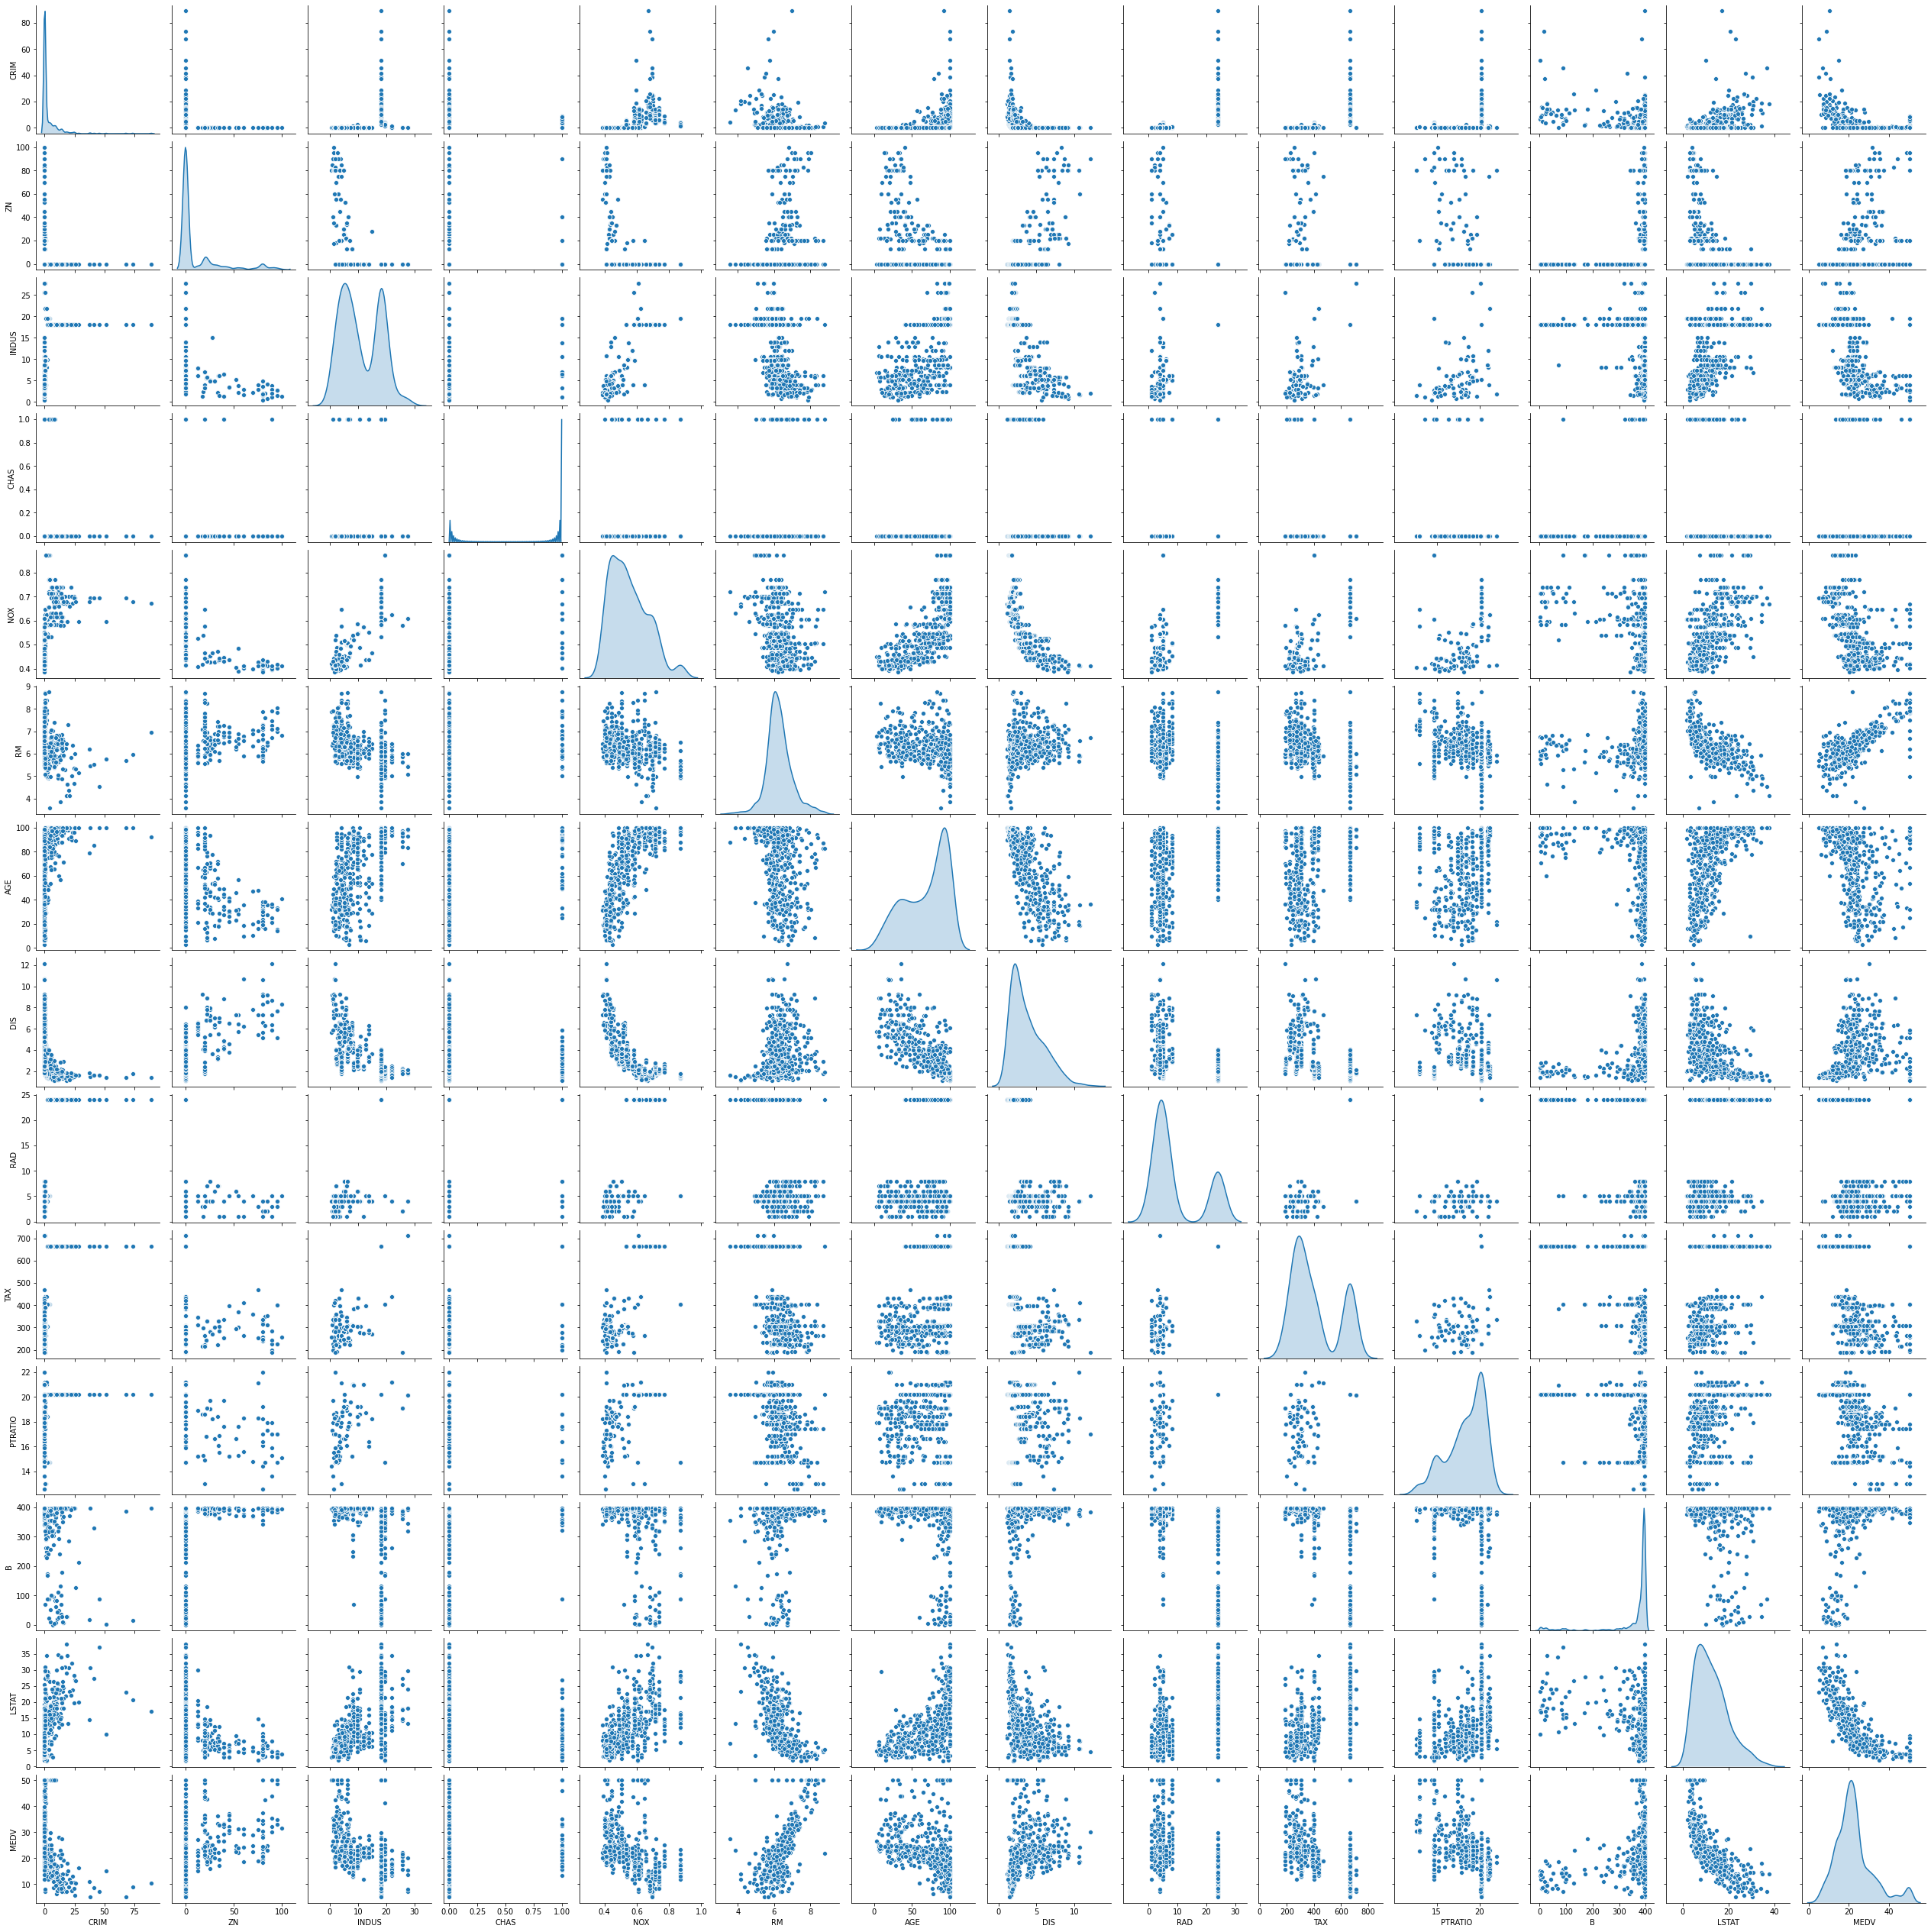

In [8]:
sns.pairplot(data, diag_kind="kde")


In [9]:
correlation_data = data.corr()
correlation_data.style.background_gradient(cmap='coolwarm',axis=None)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [10]:
stats = data.describe()
data_stats = stats.transpose()
data_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613523,8.601545,0.00632,0.082045,0.256510,3.677083,88.976196
ZN,506.0,11.363636,23.322390,0.00000,0.000000,0.000000,12.500000,100.000000
INDUS,506.0,11.136797,6.860355,0.46000,5.190000,9.690000,18.100000,27.740000
CHAS,506.0,0.069170,0.253993,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,506.0,0.554696,0.115878,0.38500,0.449000,0.538000,0.624000,0.871000
RM,506.0,6.284636,0.702617,3.56100,5.885500,6.208500,6.623500,8.780000
AGE,506.0,68.574921,28.148869,2.90000,45.025000,77.500000,94.074999,100.000000
DIS,506.0,3.795043,2.105711,1.12960,2.100175,3.207450,5.188425,12.126500
RAD,506.0,9.549407,8.707269,1.00000,4.000000,5.000000,24.000000,24.000000
TAX,506.0,408.237152,168.537170,187.00000,279.000000,330.000000,666.000000,711.000000


### Select the Required Columns

In [11]:
X_data = data[[i for i in data.columns if i not in ['MEDV']]]
Y_data = data[['MEDV']]

### Train and test split 

In [12]:
train_x, test_x, train_y,test_y = train_test_split(X_data,Y_data,test_size=0.2)
print("No. of rows in the training data:",train_x.shape[0])
print("No. of rows in the test data:",test_x.shape[0])
print("No. of columns in the training data:",train_x.shape[1])
print("No. of columns in the test data:",test_x.shape[1])

No. of rows in the training data: 404
No. of rows in the test data: 102
No. of columns in the training data: 13
No. of columns in the test data: 13


### Normalize the Data

In [13]:
def norm(x):
  stats = x.describe()
  stats = stats.transpose()
  return (x-stats['mean'])/stats['std']

norm_train_x = norm(train_x)
norm_test_x = norm(test_x)

### Build the Input Pipeline for the tensorflow Model

In [17]:
def feed_input(features_dataframe, target_dataframe, num_of_epochs=10,shuffle=True, batch_size=32):
  def input_feed_function():
    dataset = tf.data.Dataset.from_tensor_slices((dict(features_dataframe), target_dataframe))
    if shuffle:
      dataset = dataset.shuffle(2000)
    dataset = dataset.batch(batch_size).repeat(num_of_epochs)
    return dataset
  return input_feed_function

In [18]:
train_feed_input = feed_input(norm_train_x, train_y)

In [21]:
train_feed_input_testing = feed_input(norm_train_x, train_y, num_of_epochs=1, shuffle=False)

In [22]:
test_feed_input = feed_input(norm_test_x, test_y, num_of_epochs=1, shuffle=False)

### Model Training

In [24]:
feature_columns_numeric = [tf.feature_column.numeric_column(m) for m in train_x.columns]

In [45]:
feature_columns_numeric

[NumericColumn(key='CRIM', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='ZN', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='INDUS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='CHAS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='NOX', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='RM', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='AGE', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='DIS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='RAD', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='TAX', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PTRATIO'

In [25]:
linear_model = LinearRegressor(feature_columns=feature_columns_numeric, optimizer='RMSProp')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp41fhc6pg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [26]:
linear_model.train(train_feed_input)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp41fhc6pg/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 675.97815, step = 0
INFO:tensorflow:global_step/sec: 402.146
INFO:tensorflow:loss = 21.363066, step = 100 (0.250 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 130...
INFO:tensorflow:

### Model Predictions

In [28]:
train_predictions = linear_model.predict(train_feed_input_testing)
test_predictions = linear_model.predict(test_feed_input) 
train_predictions_series = pd.Series([p['predictions'][0] for p in train_predictions])
test_predictions_series = pd.Series([p['predictions'][0] for p in test_predictions])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp41fhc6pg/model.ckpt-130
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp41fhc6pg/model.ckpt-130
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [33]:
train_predictions_df = pd.DataFrame(train_predictions_series, columns=['predictions'])
test_predictions_df = pd.DataFrame(test_predictions_series, columns=['predictions']) 
train_y.reset_index(drop=True, inplace=True) 
train_predictions_df.reset_index(drop=True, inplace=True) 
test_y.reset_index(drop=True, inplace=True) 
test_predictions_df.reset_index(drop=True, inplace=True) 
train_labels_with_predictions_df = pd.concat([train_y, train_predictions_df], axis=1) 
test_labels_with_predictions_df = pd.concat([test_y, test_predictions_df], axis=1)

### Validation

In [34]:
def calculate_errors_and_r2(y_true, y_pred): 
  mean_squared_err = (mean_squared_error(y_true, y_pred)) 
  root_mean_squared_err = np.sqrt(mean_squared_err)
  r2 = round(r2_score(y_true, y_pred)*100,0)
  return mean_squared_err, root_mean_squared_err, r2

In [38]:
train_mean_squared_error, train_root_mean_squared_error,train_r2_score_percentage = calculate_errors_and_r2(train_y, train_predictions_series)

In [39]:
test_mean_squared_error, test_root_mean_squared_error,test_r2_score_percentage = calculate_errors_and_r2(test_y, test_predictions_series)

In [44]:
print('Training Data Mean Squared Error = ', train_mean_squared_error)
print('Training Data Root Mean Squared Error = ', train_root_mean_squared_error)
print('Training Data R2 = ', train_r2_score_percentage)
print('Test Data Mean Squared Error = ', test_mean_squared_error)
print('Test Data Root Mean Squared Error = ',test_root_mean_squared_error)
print('Test Data R2 = ', test_r2_score_percentage)

Training Data Mean Squared Error =  23.450703682471307
Training Data Root Mean Squared Error =  4.842592661216852
Training Data R2 =  72.0
Test Data Mean Squared Error =  27.27713126077622
Test Data Root Mean Squared Error =  5.222751311404385
Test Data R2 =  69.0
